## Observations and Insights

## Dependencies and starter code

In [792]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, how="outer",on="Mouse ID")

mouse_study_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


## Summary statistics

In [793]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_tumor_volume = mouse_study_df[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").mean()

mean_tumor_volume = mean_tumor_volume.rename(columns={"Tumor Volume (mm3)":"Mean Tumor Volume"})

mean_tumor_volume.head()

,Mean Tumor Volume
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565


In [794]:
#median
median_tumor_volume = mouse_study_df[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").median()

median_tumor_volume = median_tumor_volume.rename(columns={"Tumor Volume (mm3)":"Median Tumor Volume"})

median_tumor_volume.head()

,Median Tumor Volume
Drug Regimen,
Capomulin,41.557809
Ceftamin,51.776157
Infubinol,51.820584
Ketapril,53.698743
Naftisol,52.509285


In [795]:
#Variance
variance_tumor_volume = mouse_study_df[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").var()

variance_tumor_volume = variance_tumor_volume.rename(columns={"Tumor Volume (mm3)":"Variance Tumor Volume"})

variance_tumor_volume.head()

,Variance Tumor Volume
Drug Regimen,
Capomulin,24.947764
Ceftamin,39.290177
Infubinol,43.128684
Ketapril,68.553577
Naftisol,66.173479


In [796]:
#standard deviation
std_tumor_volume = mouse_study_df[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").std()

std_tumor_volume = std_tumor_volume.rename(columns={"Tumor Volume (mm3)":"Std Deviation Tumor Volume"})

std_tumor_volume.head()

,Std Deviation Tumor Volume
Drug Regimen,
Capomulin,4.994774
Ceftamin,6.268188
Infubinol,6.567243
Ketapril,8.279709
Naftisol,8.134708


In [797]:
#SEM
sem_tumor_volume = mouse_study_df[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").sem()

sem_tumor_volume = sem_tumor_volume.rename(columns={"Tumor Volume (mm3)":"Std Error of the Mean Tumor Volume"})

sem_tumor_volume.head()

,Std Error of the Mean Tumor Volume
Drug Regimen,
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466


In [798]:
#join the data together into a single DF
combined_stats = pd.concat([mean_tumor_volume, median_tumor_volume, variance_tumor_volume, std_tumor_volume, sem_tumor_volume], axis = 1)

combined_stats.head()

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Std Deviation Tumor Volume,Std Error of the Mean Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar plots

In [799]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

datapoints_count = mouse_study_df.groupby("Drug Regimen")

datapoints_count = datapoints_count["Drug Regimen"].count()
datapoints_count.head()

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Name: Drug Regimen, dtype: int64

In [800]:
#crete df out of above groupby
datapoints_count_df = pd.DataFrame(datapoints_count)

datapoints_count_df.columns = ["Data Points"]

datapoints_count_df

,Data Points
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,161
Ramicane,228
Stelasyn,181


(0, 250)

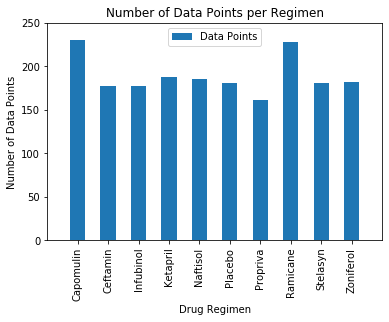

In [801]:
#generate bar chart using pandas
datapoints_chart = datapoints_count_df.plot(kind = "bar")
datapoints_chart.set_ylabel("Number of Data Points")
datapoints_chart.set_title("Number of Data Points per Regimen")
plt.xlim(-1, len(datapoints_count_df["Data Points"]))
plt.ylim(0, max(datapoints_count_df["Data Points"])+20)

(0, 250)

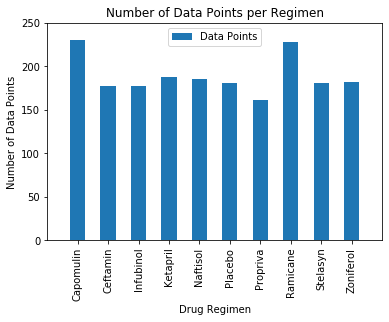

In [802]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
mouse_study_count = mouse_study_df["Drug Regimen"].unique()

mouse_study_count
x_axis = np.arange(len(mouse_study_count))

drugregimen = datapoints_count_df.index.tolist()

drugregimen

plt.bar(x_axis, datapoints_count_df["Data Points"], width=.5)

tick_locations_bar = [value for value in x_axis]
plt.xticks(tick_locations_bar, drugregimen, rotation = 90)

plt.title("Number of Data Points per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.legend(["Data Points"], loc = "upper center")
plt.xlim(-1, len(datapoints_count_df["Data Points"]))
plt.ylim(0, max(datapoints_count_df["Data Points"])+20)

## Pie plots

In [803]:
mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [804]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = mouse_study_df[["Drug Regimen","Sex"]].groupby("Sex").count()
gender_group_df = pd.DataFrame(gender_group)

gender_group_df = gender_group_df.rename(columns = {"Drug Regimen":"No. of Datapoints"})

gender_group_df.head()

,No. of Datapoints
Sex,
Female,935
Male,958


Text(0, 0.5, '')

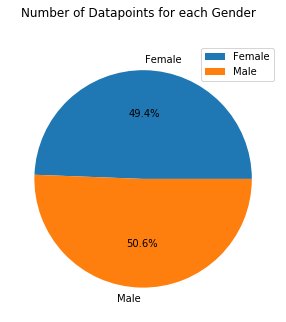

In [805]:
#generate the pie plot using pandas
gender_pie_pd = gender_group_df.plot.pie(subplots=True,figsize=(5,5),autopct="%1.1f%%", title = "Number of Datapoints for each Gender", label = False)
plt.ylabel('')


(-1.656842058548846,
 1.6503258123118498,
 -1.6540696202392673,
 1.6577592744367335)

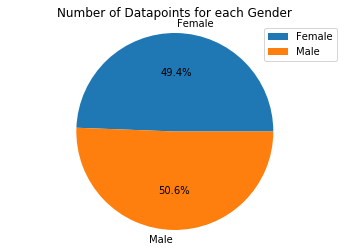

In [806]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = gender_group_df.index
datapoints = gender_group_df["No. of Datapoints"]
plt.pie(datapoints, labels=genders, autopct="%1.1f%%", radius = 1.50)
plt.title("Number of Datapoints for each Gender")
plt.legend(gender_group_df.index.tolist())
plt.axis('equal')


## Quartiles, outliers and boxplots

In [807]:
mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [808]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
tumor_df = mouse_study_df[["Mouse ID","Drug Regimen","Timepoint","Tumor Volume (mm3)"]]
tumor_df.head()

tumor_df = tumor_df.loc[(tumor_df["Drug Regimen"]=="Capomulin")| (tumor_df["Drug Regimen"]=="Ramicane")|(tumor_df["Drug Regimen"]=="Infubinol")| (tumor_df["Drug Regimen"]=="Ceftamin")]

tumor_df_sort = tumor_df.sort_values("Timepoint",ascending=False)

tumor_df_grouped = tumor_df_sort.groupby("Mouse ID").first()

tumor_df_grouped.head()


,Drug Regimen,Timepoint,Tumor Volume (mm3)
Mouse ID,,,
a203,Infubinol,45,67.973419
a251,Infubinol,45,65.525743
a275,Ceftamin,45,62.999356
a411,Ramicane,45,38.407618
a444,Ramicane,45,43.047543


In [809]:
#calculate IQR over top 4 regimens
mouse_quartiles = tumor_df_grouped["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])


print(mouse_quartiles)
lowerq = mouse_quartiles[0.25]
upperq = mouse_quartiles[0.75]
iqr = upperq-lowerq
iqr

0.25    37.187744
0.50    45.000000
0.75    59.930262
Name: Tumor Volume (mm3), dtype: float64


22.74251795250001

In [810]:
#capomulin data
capomulin_df = tumor_df_grouped.loc[(tumor_df_grouped["Drug Regimen"]=="Capomulin")]

#calculate IQR over top 4 regimens
capomulin_quartiles = capomulin_df["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])


print(capomulin_quartiles)
lowerq = capomulin_quartiles[0.25]
upperq = capomulin_quartiles[0.75]
calomulin_iqr = upperq-lowerq
calomulin_iqr

capomulin_df.head(20)

0.25    32.377357
0.50    38.125164
0.75    40.159220
Name: Tumor Volume (mm3), dtype: float64


,Drug Regimen,Timepoint,Tumor Volume (mm3)
Mouse ID,,,
b128,Capomulin,45,38.982878
b742,Capomulin,45,38.939633
f966,Capomulin,20,30.485985
g288,Capomulin,45,37.074024
g316,Capomulin,45,40.159220
i557,Capomulin,45,47.685963
i738,Capomulin,45,37.311846
j119,Capomulin,45,38.125164
j246,Capomulin,35,38.753265


In [811]:
#Ramicane data
ramicane_df = tumor_df_grouped.loc[(tumor_df_grouped["Drug Regimen"]=="Ramicane")]

#calculate IQR over top 4 regimens
ramicane_quartiles = ramicane_df["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])


print(ramicane_quartiles)
lowerq = ramicane_quartiles[0.25]
upperq = ramicane_quartiles[0.75]
ramicane_iqr = upperq-lowerq
ramicane_iqr

ramicane_df.head(20)

0.25    31.560470
0.50    36.561652
0.75    40.659006
Name: Tumor Volume (mm3), dtype: float64


,Drug Regimen,Timepoint,Tumor Volume (mm3)
Mouse ID,,,
a411,Ramicane,45,38.407618
a444,Ramicane,45,43.047543
a520,Ramicane,45,38.810366
a644,Ramicane,45,32.978522
c458,Ramicane,30,38.342008
c758,Ramicane,45,33.397653
d251,Ramicane,45,37.311236
e662,Ramicane,45,40.659006
g791,Ramicane,45,29.128472


In [812]:
#Infubinol data
infubinol_df = tumor_df_grouped.loc[(tumor_df_grouped["Drug Regimen"]=="Infubinol")]

#calculate IQR over top 4 regimens
infubinol_quartiles = infubinol_df["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])


print(infubinol_quartiles)
lowerq = infubinol_quartiles[0.25]
upperq = infubinol_quartiles[0.75]
infubinol_iqr = upperq-lowerq
infubinol_iqr

infubinol_df.head(20)

0.25    54.048608
0.50    60.165180
0.75    65.525743
Name: Tumor Volume (mm3), dtype: float64


,Drug Regimen,Timepoint,Tumor Volume (mm3)
Mouse ID,,,
a203,Infubinol,45,67.973419
a251,Infubinol,45,65.525743
a577,Infubinol,30,57.031862
a685,Infubinol,45,66.083066
c139,Infubinol,45,72.226731
c326,Infubinol,5,36.321346
c895,Infubinol,30,60.969711
e476,Infubinol,45,62.435404
f345,Infubinol,45,60.918767


In [813]:
#Ceftamin data
ceftamin_df = tumor_df_grouped.loc[(tumor_df_grouped["Drug Regimen"]=="Ceftamin")]

#calculate IQR over top 4 regimens
ceftamin_quartiles = ceftamin_df["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])


print(ceftamin_quartiles)
lowerq = ceftamin_quartiles[0.25]
upperq = ceftamin_quartiles[0.75]
ceftamin_iqr = upperq-lowerq
ceftamin_iqr

ceftamin_df.head(20)

0.25    48.722078
0.50    59.851956
0.75    64.299830
Name: Tumor Volume (mm3), dtype: float64


,Drug Regimen,Timepoint,Tumor Volume (mm3)
Mouse ID,,,
a275,Ceftamin,45,62.999356
b447,Ceftamin,0,45.000000
b487,Ceftamin,25,56.057749
b759,Ceftamin,30,55.742829
f436,Ceftamin,15,48.722078
h531,Ceftamin,5,47.784682
j296,Ceftamin,45,61.849023
k210,Ceftamin,45,68.923185
l471,Ceftamin,45,67.748662


(0, 80)

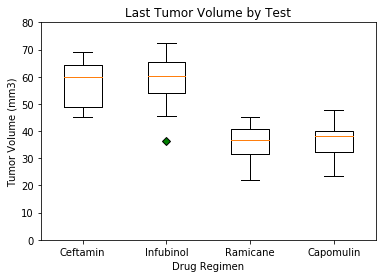

In [814]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plot_data = [ceftamin_df["Tumor Volume (mm3)"],infubinol_df["Tumor Volume (mm3)"],ramicane_df["Tumor Volume (mm3)"],capomulin_df["Tumor Volume (mm3)"]]

outlier_style = dict(markerfacecolor = "g", marker = "D")
lables =["Ceftamin", "Infubinol","Ramicane","Capomulin"]
ax1 = plt.subplot()
ax1.boxplot(plot_data, flierprops = outlier_style, labels = lables)
plt.title("Last Tumor Volume by Test")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Drug Regimen")
plt.ylim(0,80)

## Line and scatter plots

In [815]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = mouse_study_df.loc[mouse_study_df["Drug Regimen"]=="Capomulin"]

one_capomulin_df = capomulin_df[["Mouse ID", "Drug Regimen","Timepoint","Tumor Volume (mm3)"]]

one_capomulin_df = one_capomulin_df.loc[one_capomulin_df["Mouse ID"]=="s185"]
one_capomulin_df.head(10)


,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
10,s185,Capomulin,0,45.000000
11,s185,Capomulin,5,43.878496
12,s185,Capomulin,10,37.614948
13,s185,Capomulin,15,38.177232
14,s185,Capomulin,20,36.866876
15,s185,Capomulin,25,33.949940
16,s185,Capomulin,30,32.959671
17,s185,Capomulin,35,28.328531
18,s185,Capomulin,40,25.472143
19,s185,Capomulin,45,23.343598


(0, 50)

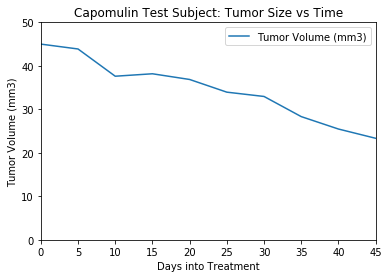

In [827]:
one_capomulin_df.plot("Timepoint",kind="line")
plt.title("Capomulin Test Subject: Tumor Size vs Time")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Days into Treatment")
plt.ylim(0,50)

In [817]:
capomulin_df = mouse_study_df.loc[mouse_study_df["Drug Regimen"]=="Capomulin"]
capomulin_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


(0, 35)

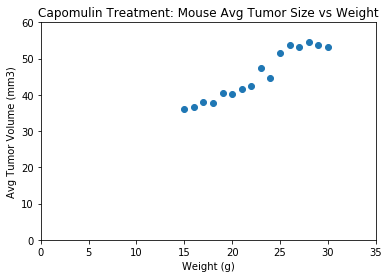

In [829]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_df = mouse_study_df.loc[mouse_study_df["Drug Regimen"]=="Capomulin"]

avg_volume = mouse_study_df.groupby("Weight (g)").mean()["Tumor Volume (mm3)"]


weight_avg_volume_df= pd.DataFrame(avg_volume)

weight_avg_volume_df=weight_avg_volume_df.rename(columns = {"Tumor Volume (mm3)":"Avg Tumor Volume"})

weight_avg_volume_df.head()
weight_avg_volume_df.reset_index(level=0, inplace=True)


plt.scatter(weight_avg_volume_df["Weight (g)"], weight_avg_volume_df["Avg Tumor Volume"])
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.title("Capomulin Treatment: Mouse Avg Tumor Size vs Weight")
plt.ylim(0,60)
plt.xlim(0,35)

In [819]:
weight_avg_volume_df.head()

,Weight (g),Avg Tumor Volume
0,15,36.182040
1,16,36.766850
2,17,38.039595
3,18,37.882878
4,19,40.490692


In [820]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
cc = st.pearsonr(weight_avg_volume_df["Weight (g)"],weight_avg_volume_df["Avg Tumor Volume"])[0]

cc

0.9625791810018305

In [821]:
#linear regression model
vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(weight_avg_volume_df["Weight (g)"],weight_avg_volume_df["Avg Tumor Volume"])

vc_fit = vc_slope * weight_avg_volume_df["Weight (g)"] + vc_int


(0, 35)

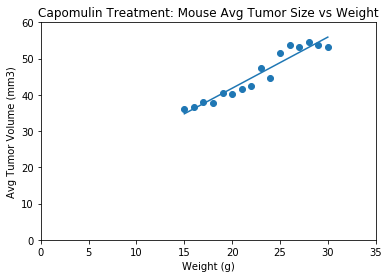

In [830]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen with linear model
capomulin_df = mouse_study_df.loc[mouse_study_df["Drug Regimen"]=="Capomulin"]

avg_volume = mouse_study_df.groupby("Weight (g)").mean()["Tumor Volume (mm3)"]


weight_avg_volume_df= pd.DataFrame(avg_volume)

weight_avg_volume_df=weight_avg_volume_df.rename(columns = {"Tumor Volume (mm3)":"Avg Tumor Volume"})

weight_avg_volume_df.head()
weight_avg_volume_df.reset_index(level=0, inplace=True)


plt.scatter(weight_avg_volume_df["Weight (g)"], weight_avg_volume_df["Avg Tumor Volume"])
plt.plot(weight_avg_volume_df["Weight (g)"],vc_fit)
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.title("Capomulin Treatment: Mouse Avg Tumor Size vs Weight")
plt.ylim(0,60)
plt.xlim(0,35)